<a href="https://colab.research.google.com/github/Shils123/Project1/blob/main/Rohit_Mathur_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

data_dir_train = pathlib.Path("/content/gdrive/My Drive/Assingment")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Assingment')
print(pathlib.Path.cwd()) 
path = pathlib.Path.cwd()
p = pathlib.Path('/content/gdrive/My Drive/Assingment')
for f in p.iterdir():
    print(f)

/content
/content/gdrive/My Drive/Assingment/actinic keratosis
/content/gdrive/My Drive/Assingment/basal cell carcinoma
/content/gdrive/My Drive/Assingment/dermatofibroma
/content/gdrive/My Drive/Assingment/melanoma
/content/gdrive/My Drive/Assingment/nevus
/content/gdrive/My Drive/Assingment/pigmented benign keratosis
/content/gdrive/My Drive/Assingment/seborrheic keratosis
/content/gdrive/My Drive/Assingment/squamous cell carcinoma
/content/gdrive/My Drive/Assingment/vascular lesion


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed =123,
    subset= 'training',
    validation_split= 0.2)

print(type(train_ds))

#train_ds = tf.keras.utils.to_categorical(y_train, num_classes)
# The data, split between train and test sets:


Found 118 files belonging to 9 classes.
Using 95 files for training.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed =123,
    subset= 'validation',
    validation_split= 0.2)

print(type(val_ds))

Found 118 files belonging to 9 classes.
Using 23 files for validation.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

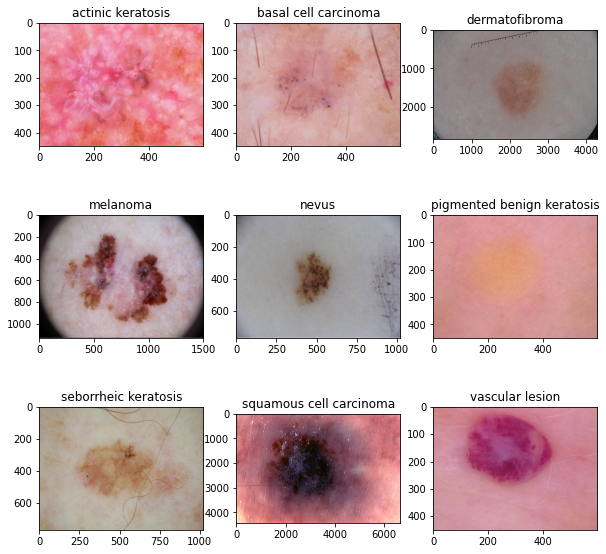

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 8s 2s/step - loss: 2.2581 - accuracy: 0.1263 - val_loss: 2.2968 - val_accuracy: 0.0435
Epoch 2/20
3/3 [==============================] - 1s 184ms/step - loss: 2.0685 - accuracy: 0.1579 - val_loss: 2.2545 - val_accuracy: 0.0435
Epoch 3/20
3/3 [==============================] - 1s 181ms/step - loss: 2.0897 - accuracy: 0.1684 - val_loss: 2.2950 - val_accuracy: 0.0435
Epoch 4/20
3/3 [==============================] - 1s 183ms/step - loss: 2.0310 - accuracy: 0.2526 - val_loss: 2.4273 - val_accuracy: 0.0435
Epoch 5/20
3/3 [==============================] - 1s 181ms/step - loss: 2.1005 - accuracy: 0.2000 - val_loss: 2.6333 - val_accuracy: 0.0870
Epoch 6/20
3/3 [==============================] - 1s 181ms/step - loss: 1.9440 - accuracy: 0.3158 - val_loss: 2.3222 - val_accuracy: 0.1304
Epoch 7/20
3/3 [==============================] - 1s 183ms/step - loss: 1.9831 - accuracy: 0.2632 - val_loss: 2.7079 - val_accuracy: 0.0435
Epoch 8/20
3/3 [==================

### Visualizing training results

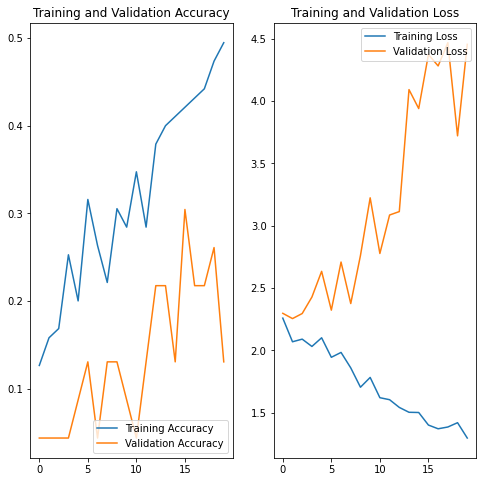

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[link text](https://)#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

# Model starts to overfit after 15  epoch
#Trainig accuracy is just 50% due to less data available for training 

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

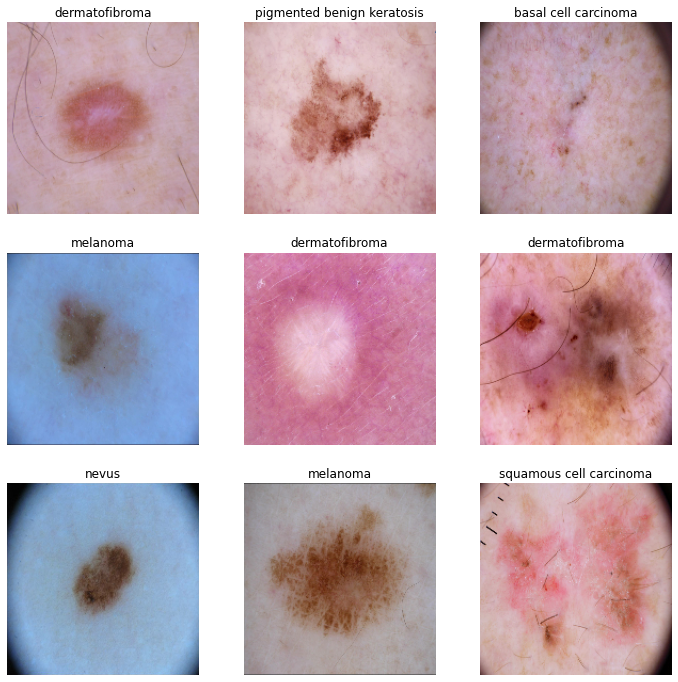

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [ ]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 5s 937ms/step - loss: 2.2804 - accuracy: 0.0947 - val_loss: 2.2040 - val_accuracy: 0.0870
Epoch 2/30
3/3 [==============================] - 1s 197ms/step - loss: 2.1419 - accuracy: 0.1579 - val_loss: 2.3551 - val_accuracy: 0.1304
Epoch 3/30
3/3 [==============================] - 1s 199ms/step - loss: 2.0733 - accuracy: 0.1895 - val_loss: 2.2927 - val_accuracy: 0.0870
Epoch 4/30
3/3 [==============================] - 1s 201ms/step - loss: 1.9391 - accuracy: 0.2211 - val_loss: 2.5235 - val_accuracy: 0.0870
Epoch 5/30
3/3 [==============================] - 1s 198ms/step - loss: 1.9374 - accuracy: 0.1895 - val_loss: 2.3496 - val_accuracy: 0.0435
Epoch 6/30
3/3 [==============================] - 1s 199ms/step - loss: 1.7655 - accuracy: 0.3053 - val_loss: 2.3109 - val_accuracy: 0.1304
Epoch 7/30
3/3 [==============================] - 1s 198ms/step - loss: 1.7480 - accuracy: 0.3789 - val_loss: 2.5803 - val_accuracy: 0.0000e+00
Epoch 8/30
3/3 [===========

### Visualizing the results

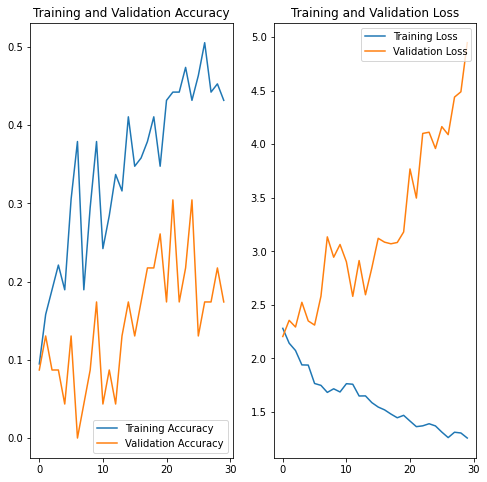

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# There is no improvment in model accuracy

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
1,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
2,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
3,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
4,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
...,...,...
113,/content/gdrive/My Drive/Assingment/squamous c...,squamous cell carcinoma
114,/content/gdrive/My Drive/Assingment/squamous c...,squamous cell carcinoma
115,/content/gdrive/My Drive/Assingment/vascular l...,vascular lesion
116,/content/gdrive/My Drive/Assingment/vascular l...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
1,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
2,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
3,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
4,/content/gdrive/My Drive/Assingment/actinic ke...,actinic keratosis
...,...,...
113,/content/gdrive/My Drive/Assingment/squamous c...,squamous cell carcinoma
114,/content/gdrive/My Drive/Assingment/squamous c...,squamous cell carcinoma
115,/content/gdrive/My Drive/Assingment/vascular l...,vascular lesion
116,/content/gdrive/My Drive/Assingment/vascular l...,vascular lesion


<BarContainer object of 9 artists>

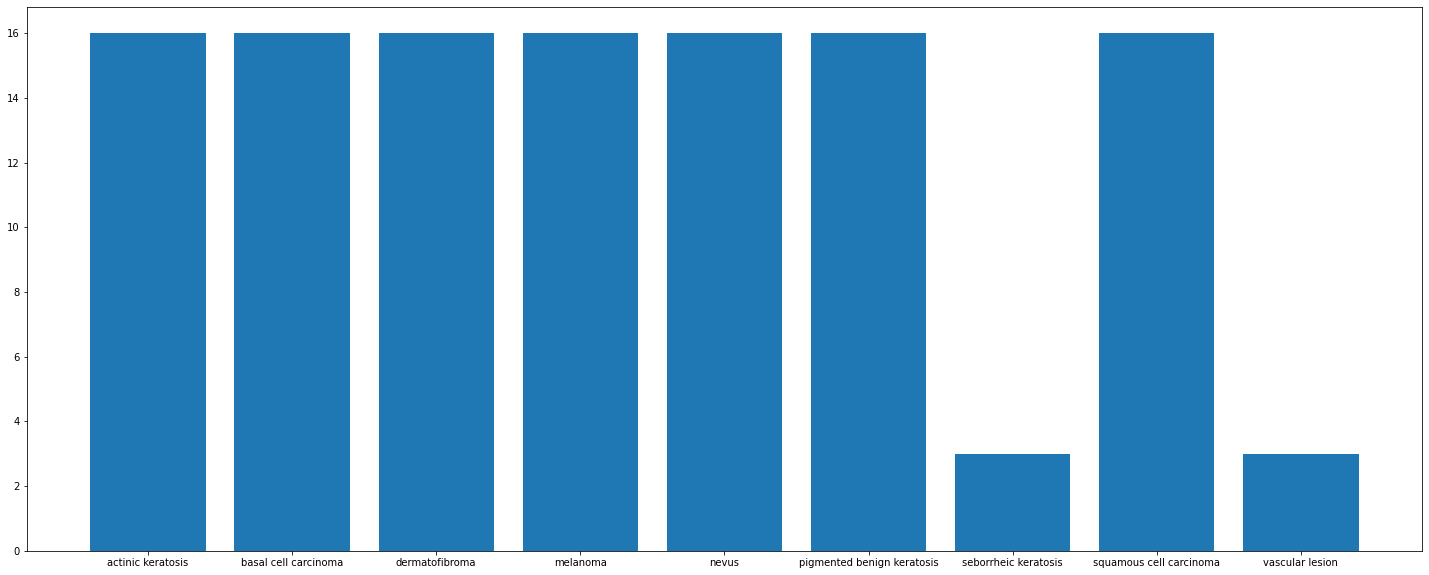

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/My Drive/Assingment",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=6601x4380 at 0x7F9E989E5890>: 100%|██████████| 500/500 [03:21<00:00,  2.48 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9F14B6A690>: 100%|██████████| 500/500 [03:12<00:00,  2.59 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9E9A1FFA90>: 100%|██████████| 500/500 [02:45<00:00,  3.02 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=6668x4419 at 0x7F9E9A1B0A90>: 100%|██████████| 500/500 [03:04<00:00,  2.71 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=1022x767 at 0x7F9E9A1A7390>: 100%|██████████| 500/500 [03:28<00:00,  2.40 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9E1F3A4B50>: 100%|██████████| 500/500 [02:36<00:00,  3.19 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9E1F2640D0>: 100%|██████████| 500/500 [02:54<00:00,  2.86 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9E1F3C94D0>: 100%|██████████| 500/500 [02:56<00:00,  2.83 Samples/s]


Initialised with 118 image(s) found.
Output directory set to /content/gdrive/My Drive/Assingment/output.

Processing <PIL.Image.Image image mode=RGB size=6648x4439 at 0x7F9E1F16D690>: 100%|██████████| 500/500 [03:46<00:00,  2.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train1 = pathlib.Path("/content/gdrive/My Drive/Assingment/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)


4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
# Import necessary packages
#import os
#from glob import glob
#path_list = [x for x in glob(os.path.join(data_dir_train1, '*', '*.jpg'))]
#path_list
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df



,Path,Label
0,/content/gdrive/My Drive/Assingment/output/act...,squamous cell carcinoma
1,/content/gdrive/My Drive/Assingment/output/act...,squamous cell carcinoma
2,/content/gdrive/My Drive/Assingment/output/act...,squamous cell carcinoma
3,/content/gdrive/My Drive/Assingment/output/act...,squamous cell carcinoma
4,/content/gdrive/My Drive/Assingment/output/act...,squamous cell carcinoma
...,...,...
4495,/content/gdrive/My Drive/Assingment/output/vas...,squamous cell carcinoma
4496,/content/gdrive/My Drive/Assingment/output/vas...,squamous cell carcinoma
4497,/content/gdrive/My Drive/Assingment/output/vas...,squamous cell carcinoma
4498,/content/gdrive/My Drive/Assingment/output/vas...,squamous cell carcinoma


In [ ]:
#lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
#lesion_list_new

['Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingment',
 'Assingme

In [ ]:
#dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

NameError: ignored

In [ ]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

actinic keratosis             679
nevus                         665
pigmented benign keratosis    643
basal cell carcinoma          642
melanoma                      627
dermatofibroma                607
squamous cell carcinoma       397
seborrheic keratosis          129
vascular lesion               111
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir_train1 = pathlib.Path("/content/gdrive/My Drive/Assingment/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


#### **Todo:** Create a training dataset

In [ ]:
#data_dir_train="path to directory with training data + data created using augmentor"
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  image_size=(img_height, img_width),
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 68s 570ms/step - loss: 1.5620 - accuracy: 0.3892 - val_loss: 0.9453 - val_accuracy: 0.6411
Epoch 2/50
113/113 [==============================] - 66s 555ms/step - loss: 0.6635 - accuracy: 0.7664 - val_loss: 0.2916 - val_accuracy: 0.9256
Epoch 3/50
113/113 [==============================] - 66s 553ms/step - loss: 0.2353 - accuracy: 0.9256 - val_loss: 0.0748 - val_accuracy: 0.9889
Epoch 4/50
113/113 [==============================] - 66s 555ms/step - loss: 0.1061 - accuracy: 0.9656 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 5/50
113/113 [==============================] - 66s 556ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0090 - val_accuracy: 0.9978
Epoch 6/50
113/113 [==============================] - 66s 553ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0186 - val_accuracy: 0.9933
Epoch 7/50
113/113 [==============================] - 66s 556ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 7.8315e-04 - val_accuracy:

#### **Todo:**  Visualize the model results

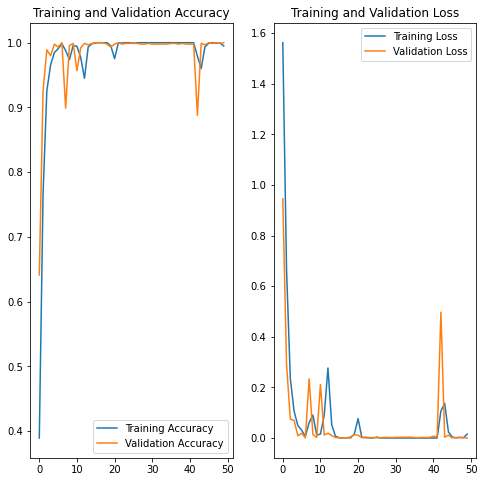

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
# Accuracy of data has increased 
# Model is overfitting